# Программирование и анализ данных
## Визуализация данных с `seaborn`

*Алла Тамбовцева, НИУ ВШЭ*

В этой лекции мы будем строить графики для визуализации распределения данных с помощью библиотеки `seaborn`. Эту библиотеку можно считать некоторой «надстройкой» над библиотекой `matplotlib`, которая предлагает более удобные функции для построения графиков разных видов и более симпатичный дизайн для графиков. Для начала установим её. 

In [ ]:
!pip install seaborn

Теперь импортируем эту библиотеку с сокращённым названием `sns`, а заодно импортируем модуль `pyplot` из `matplotlib`, который нам тоже понадобится для настройки графиков. 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

Теперь сделаем так, чтобы все графики далее строились с использованием настроек по умолчанию из `seaborn`, а не из `matplotlib` (более красиво, так как автоматически добавляется светло-серый фон графика, сетка и прочее).

In [2]:
sns.set()

Загрузим данные из файла `Chile.csv`, сохраним их в датафрейм и удалим строки с пропущенными значениями (многие функции для графики не работают в случае, если в визуализируемых данных остались `NaN`, при желании пропуски можно не удалять, а заполнить с помощью метода `.fillna()`.

In [5]:
import pandas as pd
ch = pd.read_csv("Chile.csv")
ch.dropna(inplace = True)
ch.head() 

,Unnamed: 0,region,population,sex,age,education,income,statusquo,vote
0,1,N,175000,M,65.0,P,35000.0,1.00820,Y
1,2,N,175000,M,29.0,PS,7500.0,-1.29617,N
2,3,N,175000,F,38.0,P,15000.0,1.23072,Y
3,4,N,175000,F,49.0,P,35000.0,-1.03163,N
4,5,N,175000,F,23.0,S,35000.0,-1.10496,N


**Показатели:**

* `region`: регион, где живет респондент (`C`, Central; `M`, Metropolitan Santiago area; `N`, North; `S`, South; `SA`, City of Santiago);
* `sex`: пол респондента;
* `population`: численность населения в регионе респондента;
* `age`: возраст респондента;
* `education`: уровень образования респондента (`P`, Primary; `PS`, Post-secondary; `S`, Secondary);
* `income`: доход респондента;
* `statusquo`: индекс отношения к статус-кво (чем больше значение, тем больше человек склонен одобрять сохранение статус-кво – нахождение Пиночета у власти);
* `vote`: как респондент собирается голосовать (`A`, will abstain; `N`, will vote no – against Pinochet; `U`, undecided; `Y`, will vote yes – for Pinochet).

### Гистограмма и график плотности распределения

Построим простенькую гистограмму для столбца `age`. В `seaborn` нет отдельной функции для гистограммы, но есть функция `distplot()`, которая по умолчанию строит гистограмму и накладывает на неё сглаженный график плотности распределения (отсюда и название, *distplot* – от *distribution*).

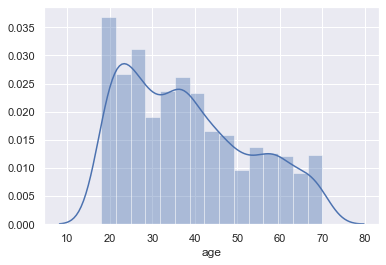

In [6]:
sns.distplot(ch["age"]) 

Давайте теперь уберём сглаженный график плотности и изменим цвет гистограммы.

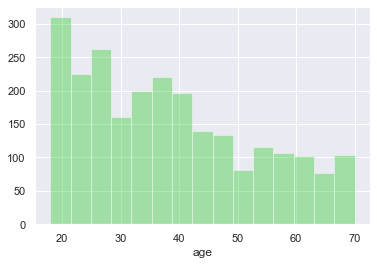

In [7]:
sns.distplot(ch["age"], kde = False, 
             color = "limegreen")

Аргумент `kde` отвечает за наличие или отсутствие сглаженного графика плотности, и название его неслучайно. Аббревиатура `kde` происходит от *kernel density estimation* (ядерная оценка плотности), почитать можно [здесь](https://ru.wikipedia.org/wiki/%D0%AF%D0%B4%D0%B5%D1%80%D0%BD%D0%B0%D1%8F_%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BF%D0%BB%D0%BE%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B8).

Теперь добавим аргумент `bins` для настройки числа столбцов и особый аргумент `hist_kws` с перечнем аргументов для построения гистограммы:

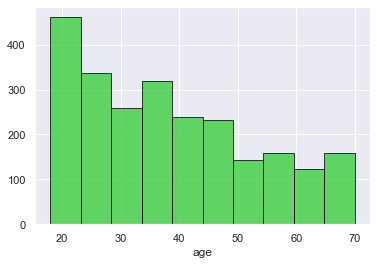

In [12]:
# alpha – прозрачность (1 - нет прозрачности)
# edgecolor – цвет границ столбцов

sns.distplot(ch["age"], 
             kde = False, 
             color = "limegreen", 
             bins = 10, 
             hist_kws = {'alpha' : 0.75, 
                        'edgecolor' : 'black'})

Аргументы для настройки гистограммы указываются особым образом, в виде словаря. На первый взгляд это кажется необычным, но если вспомнить про `kwargs` (*keywords arguments*) в функциях, всё встанет на свои места. Здесь внутри `hist_kws` (как раз *histogram keywords*) можно указывать сколько угодно аргументов для настройки вида гистограммы, но при этом нужно обязательно фиксировать их названия. В итоге получаем словарь с ключами в виде названий аргументов.

Если бы мы хотели сохранить наложенный график плотности на рисунке, можно было бы и его вид настроить аналогичным образом:

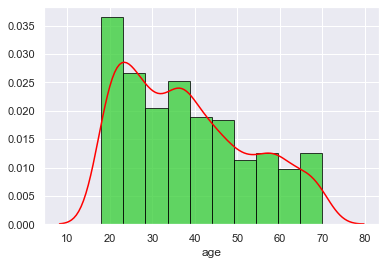

In [13]:
sns.distplot(ch["age"], 
             color = "limegreen", 
             bins = 10, 
             hist_kws = {'alpha' : 0.75, 
                        'edgecolor' : 'black'},
             kde_kws = {'color' : 'red'})

Теперь добавим заголовок графика и подписи к осям. Сделать это можно с помощью методов из модуля `pyplot`, который мы сократили до `plt`:

Text(0.5, 1.0, 'Distribution of age')

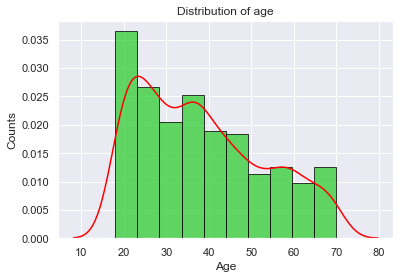

In [14]:
sns.distplot(ch["age"], 
             color = "limegreen", 
             bins = 10, 
             hist_kws = {'alpha' : 0.75, 
                        'edgecolor' : 'black'},
             kde_kws = {'color' : 'red'})
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Distribution of age")

Добавить горизонтальную линию, которая отчерчивает определённую частоту можно с помощью того же модуля `plt`:

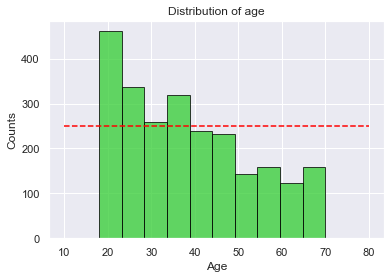

In [25]:
sns.distplot(ch["age"], 
             color = "limegreen", 
             kde = False,
             bins = 10, 
             hist_kws = {'alpha' : 0.75, 
                        'edgecolor' : 'black'})
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Distribution of age")

# метод hlines
plt.hlines(y = 250, xmin = 10, xmax = 80, 
          color = "red", linestyles = "dashed")

В методе `.hlines()` необходимо указать не только необходимое значение по вертикальной оси (`y`), но и установить рамки по горизонтальной оси (`xmin` и `xmax`), даже если прямая должна проходить через весь график. Согласно документации, стилей для линии всего 4: `'solid'` (непрерывная линия), `'dashed'` (пунктирная линия), `'dashdot'` (точка-тире), `'dotted'` (линия из точек).

Аналогичным образом можно добавить вертикальную линию через `.vlines()`:

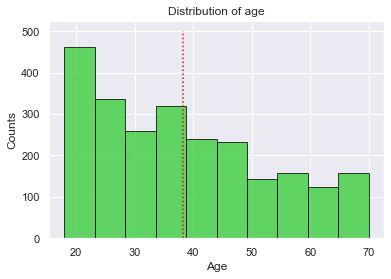

In [29]:
sns.distplot(ch["age"], 
             color = "limegreen", 
             kde = False,
             bins = 10, 
             hist_kws = {'alpha' : 0.75, 
                        'edgecolor' : 'black'})
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Distribution of age")

# метод vlines
# вертикальная линия отмечает среднее значение по столбцу
plt.vlines(x = ch["age"].mean(), ymin = 0, ymax = 500, 
          color = "red", linestyles = "dotted")

Если нам нужен только сглаженный график плотности, можно воспользоваться функцией `kdeplot()`:

Text(0.5, 1.0, 'Age of responsents')

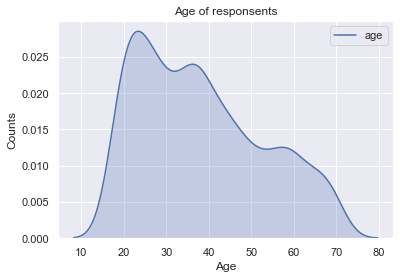

In [30]:
sns.kdeplot(ch["age"], shade = True)
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Age of responsents")

В данном примере мы добавили опцию `shade=True`, чтобы площадь под графиком была закрашена. Сглаженные графики плотности иногда полезны, но стоит помнить, что из-за сглаживания они получаются менее точными, чем гистограммы, поэтому их не очень хорошо полезно использовать, когда данных мало или когда нам важны точные частоты или «пики» распределения.

Иногда на такие графики добавляют так называемые *rugs* (нет точного термина на русском, можно рассматривать как засечки), которые будут показывать, сколько наблюдений на том или ином участке графика. Но такая опция есть только у `distplot()`:

Text(0.5, 1.0, 'Age of responsents')

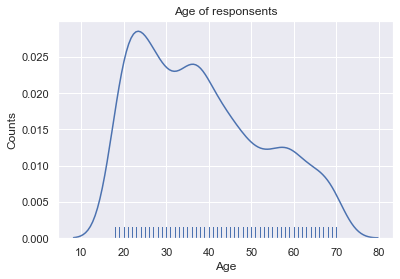

In [38]:
# «выключаем» гистограмму
# «включаем» rugs

sns.distplot(ch["age"], 
             hist = False, 
             rug = True)
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Age of responsents")

Теперь попробуем построить графики по группам. Посмотрим на распределение возраста респондентов, сгруппированных по региону и по полу. Для начала создадим шаблон для графика — график с множеством ячеек-фасеток, где каждая ячейка-фасетка соответствует одной группе. По строкам у нас будут идти значения пола (их два), по столбцам – значения региона (их пять):

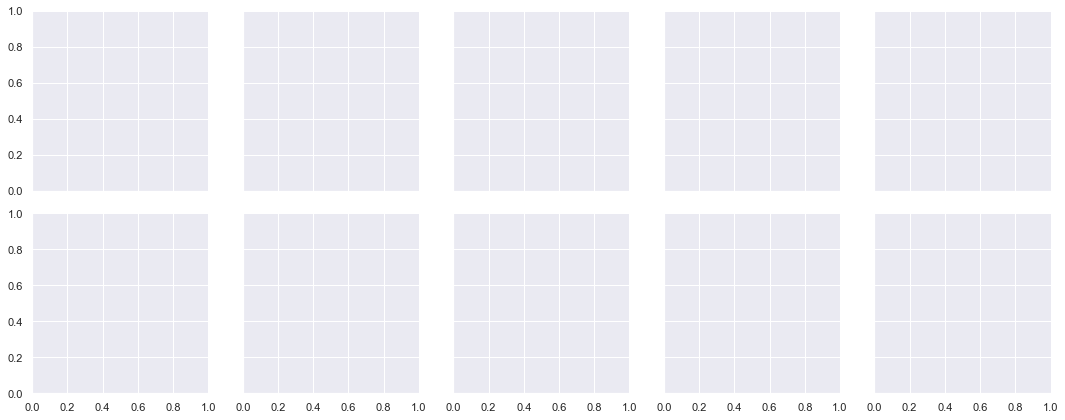

In [39]:
# функция FacetGrid создает сетку
# margin_titles – наличие подписей по строкам и столбцам

g = sns.FacetGrid(ch, row="sex", 
                  col="region", 
                  margin_titles=True)
g

Осталось только сообщить, что за графики будут в каждой ячейке. Для этого применим метод `.map()` и укажем, что мы строим гистограмму (`hist`) для столбца `age`.

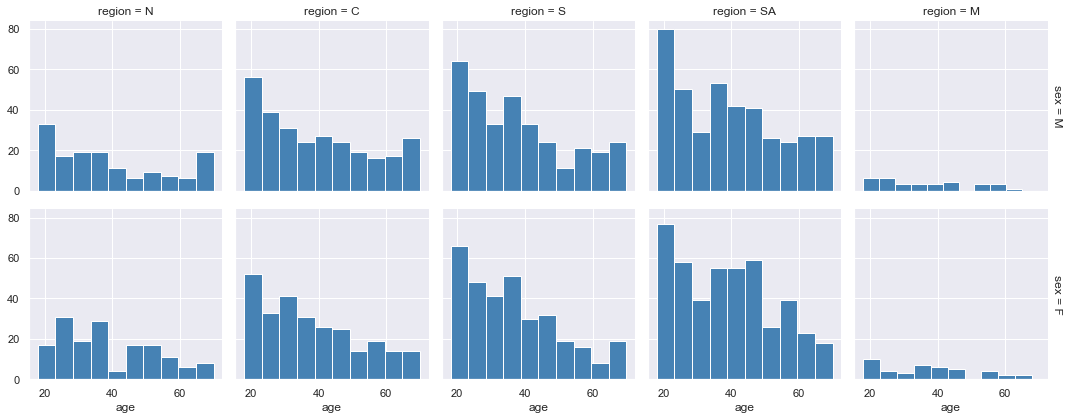

In [41]:
g = sns.FacetGrid(ch, row="sex", 
                  col="region", 
                  margin_titles=True)
g.map(plt.hist, "age", color="steelblue")

**Важно:** строки с `FacetGrid()` и `.map()` должны быть в одной ячейке, они связаны. 

### Столбиковая диаграмма

Построим столбиковую диаграмму (*bar plot* или *bar chart*), чтобы показать, сколько респондентов из разных регионов участвовало в опросе. Для этого нам понадобится табличка с частотами для каждого названия региона. Создадим её с помощью уже знакомого метода `.value_counts()` и сохраним в переменную `tab`:

In [43]:
tab = ch["region"].value_counts()
tab

SA    848
S     655
C     548
N     305
M      75
Name: region, dtype: int64

Функция `barplot()`, которую мы будем использовать для построения столбиковой диаграммы, принимает на вход два набора значений: список или массив значений по оси `x` (подписи к столбикам) и список или массив значений по оси `y` (частоты). Извлечём их из `tab`:

In [44]:
x = tab.index
y = tab.values

In [45]:
x, y

(Index(['SA', 'S', 'C', 'N', 'M'], dtype='object'),
 array([848, 655, 548, 305,  75]))

Теперь поменяем фон у графика на белый и построим диаграмму:

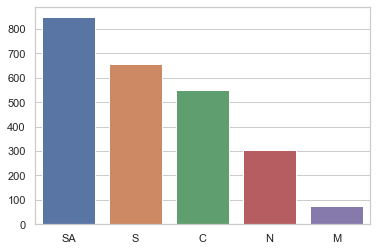

In [47]:
sns.set_style("whitegrid")
sns.barplot(x, y)

Теперь попробуем построить похожий график, только с группировкой по полу. Другими словами, мы хотим получить график, где для каждого региона строится столбик отдельно для мужчин и отдельно для женщин. Опять же, сначала сгруппируем данные:

In [48]:
res = ch.groupby(['region', 'sex'], as_index=False).count()
res

,region,sex,Unnamed: 0,population,age,education,income,statusquo,vote
0,C,F,269,269,269,269,269,269,269
1,C,M,279,279,279,279,279,279,279
2,M,F,43,43,43,43,43,43,43
3,M,M,32,32,32,32,32,32,32
4,N,F,159,159,159,159,159,159,159
5,N,M,146,146,146,146,146,146,146
6,S,F,330,330,330,330,330,330,330
7,S,M,325,325,325,325,325,325,325
8,SA,F,449,449,449,449,449,449,449
9,SA,M,399,399,399,399,399,399,399


Опция `as_index = False` нужна для того, чтобы `region` и `sex` не записывались как уровни (отдельный атрибут), а чтобы для каждой пары *регион-пол* создавалась отдельная строка. Сравните результат выше с результатом, полученным без `as_index=False`:

In [49]:
ch.groupby(['region', 'sex']).count() 

Unnamed: 0  population  age  education  income  statusquo  vote
region sex                                                                 
C      F           269         269  269        269     269        269   269
       M           279         279  279        279     279        279   279
M      F            43          43   43         43      43         43    43
       M            32          32   32         32      32         32    32
N      F           159         159  159        159     159        159   159
       M           146         146  146        146     146        146   146
S      F           330         330  330        330     330        330   330
       M           325         325  325        325     325        325   325
SA     F           449         449  449        449     449        449   449
       M           399         399  399        399     399        399   399

Вся таблица `res` нам не нужна, поскольку в ней много одинаковых числовых столбцов. Выберем столбцы `region` и `sex` (нужны для группировки) и столбец `vote` (один из числовых столбцов, могли взять другой):

In [50]:
freq = res[['region', 'sex', 'vote']]
freq

,region,sex,vote
0,C,F,269
1,C,M,279
2,M,F,43
3,M,M,32
4,N,F,159
5,N,M,146
6,S,F,330
7,S,M,325
8,SA,F,449
9,SA,M,399


Осталось, используя табличку `freq` выше, построить график! Применим функцию `catplot()`, от *categorical plot*, график для категориальных (нечисловых) данных:

In [ ]:
sns.catplot(x = "region", 
            y = "vote", 
            hue = "sex", 
            data=freq,
            kind="bar")
plt.ylabel("Counts")
plt.xlabel("Region")

По оси `x` указаны значения из `region`, по оси `y` – частоты из `vote`, внутри каждого региона добавляем группировку по значениям `sex` и делаем столбцы разного цвета (`hue`), сообщаем, что все эти столбцы берутся из таблицы `freq`. 

Если мы хотим поменять цвета у столбцов, можем указать другую цветовую палитру (нашли её в [документации](https://matplotlib.org/3.1.3/tutorials/colors/colormaps.html) `matplotlib`):

Text(0.5, 22.960000000000015, 'Region')

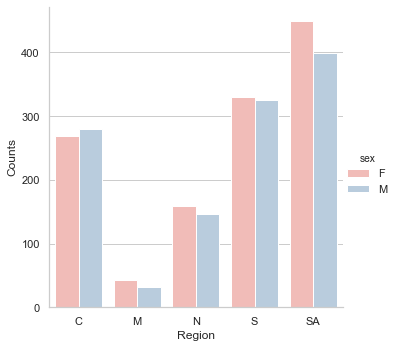

In [51]:
# аргумент palette

sns.catplot(x = "region", 
            y = "vote", 
            hue = "sex", 
            data=freq,
            kind="bar",
            palette = "Pastel1")
plt.ylabel("Counts")
plt.xlabel("Region")